In [154]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

In [80]:
df=pd.read_csv("ckd.csv")
#reading the data

In [81]:
df.head(10)
#SHOWING TOP 10 ROWS

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38.0,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,...,39.0,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,...,36.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
7,7,24.0,NaN,1.015,2.0,4.0,1.0,0.0,0.0,0.0,...,44.0,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1
8,8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,...,33.0,9600,4,1.0,1.0,0.0,1.0,0.0,1.0,1
9,9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,...,29.0,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1


In [82]:
df.tail(10)
#showing last 10 rows

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
390,390,52.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,52.0,6300,5.3,0.0,0.0,0.0,1.0,0.0,0.0,0
391,391,36.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,44.0,5800,6.3,0.0,0.0,0.0,1.0,0.0,0.0,0
392,392,57.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,46.0,6600,5.5,0.0,0.0,0.0,1.0,0.0,0.0,0
393,393,43.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7400,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
394,394,50.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,45.0,9500,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0
399,399,58.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,53.0,6800,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0


In [83]:
df.isnull().sum()

id                         0
age                        9
bloodpressure             12
specificgravity           47
albumin                   46
sugar                     49
redbloodcells            152
puscell                   65
puscellclumps              4
bacteria                   4
bloodglucoserandom        44
bloodurea                 19
serumcreatinine           17
sodium                    87
potassium                 88
haemoglobin               52
packedcellvolume          71
whitebloodcellcount      105
redbloodcellcount        130
hypertension               2
diabetesmellitus           2
coronaryarterydisease      2
appetite                   1
pedaledema                 1
anemia                     1
classification             0
dtype: int64

We Can see that there are some NaN values in the dataset.
So we have to remove that.
For that we are using backward fillna method.

In [84]:
df=df.bfill(axis ='rows') 

In [85]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,potassium,haemoglobin,packedcellvolume,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,4.569000,12.388500,38.12750,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,2.846858,2.865265,8.98209,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,3.100000,9.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,3.800000,10.400000,32.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.400000,12.500000,39.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.900000,14.800000,44.25000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,47.000000,17.800000,54.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
df.head()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,3.9,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [87]:
df[30:80]

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
30,30,73.0,70.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,...,30.0,7800,4,1.0,1.0,0.0,1.0,0.0,0.0,1
31,31,73.0,90.0,1.015,3.0,0.0,0.0,0.0,1.0,0.0,...,30.0,7800,4,0.0,0.0,0.0,0.0,0.0,0.0,1
32,32,61.0,90.0,1.010,1.0,1.0,0.0,1.0,0.0,0.0,...,34.0,9600,4,1.0,1.0,0.0,0.0,0.0,0.0,1
33,33,60.0,100.0,1.020,2.0,0.0,0.0,0.0,0.0,0.0,...,29.0,9800,4.9,1.0,0.0,0.0,0.0,0.0,0.0,1
34,34,70.0,70.0,1.010,1.0,0.0,1.0,1.0,1.0,1.0,...,36.0,9800,4.9,0.0,1.0,0.0,0.0,0.0,0.0,1
35,35,65.0,90.0,1.020,2.0,1.0,0.0,1.0,0.0,0.0,...,36.0,9800,4.9,1.0,1.0,0.0,0.0,0.0,1.0,1
36,36,76.0,70.0,1.015,1.0,0.0,1.0,1.0,0.0,0.0,...,32.0,6900,2.5,1.0,0.0,0.0,1.0,0.0,0.0,1
37,37,72.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,28.0,6900,2.5,1.0,1.0,0.0,0.0,0.0,1.0,1
38,38,69.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,40.0,9800,4.2,1.0,0.0,0.0,1.0,0.0,0.0,1
39,39,82.0,80.0,1.010,2.0,2.0,1.0,0.0,0.0,0.0,...,40.0,9800,4.2,1.0,1.0,0.0,1.0,0.0,0.0,1


In [88]:
df.isnull().sum()

id                       0
age                      0
bloodpressure            0
specificgravity          0
albumin                  0
sugar                    0
redbloodcells            0
puscell                  0
puscellclumps            0
bacteria                 0
bloodglucoserandom       0
bloodurea                0
serumcreatinine          0
sodium                   0
potassium                0
haemoglobin              0
packedcellvolume         0
whitebloodcellcount      0
redbloodcellcount        0
hypertension             0
diabetesmellitus         0
coronaryarterydisease    0
appetite                 0
pedaledema               0
anemia                   0
classification           0
dtype: int64

In [89]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount       object
redbloodcellcount         object
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

We can see that the the NaN values have been countered .But in the dataypes,there are 2 columns(whitebloodcellcount,redbloodcellcount) which are of the type objects.
We have to counter them as well.

In [90]:

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])


C:\Users\aditya1234\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount        int32
redbloodcellcount          int32
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

In [92]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,38.12750,52.947500,24.207500,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,8.98209,27.134396,9.925509,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,32.00000,32.750000,17.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,39.00000,60.000000,24.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.25000,74.000000,31.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.00000,91.000000,45.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


So now this is our final dataset(df1) after pre-processing.
So this data can be carried out to buld our model and mke predictions 


Let us normalise the data,

In [93]:
a=df.max()
a
#Maximum Values of each attribute are being displayed

id                       399.000
age                       90.000
bloodpressure            180.000
specificgravity            1.025
albumin                    5.000
sugar                      5.000
redbloodcells              1.000
puscell                    1.000
puscellclumps              1.000
bacteria                   1.000
bloodglucoserandom       490.000
bloodurea                391.000
serumcreatinine           76.000
sodium                   163.000
potassium                 47.000
haemoglobin               17.800
packedcellvolume          54.000
whitebloodcellcount       91.000
redbloodcellcount         45.000
hypertension               1.000
diabetesmellitus           1.000
coronaryarterydisease      1.000
appetite                   1.000
pedaledema                 1.000
anemia                     1.000
classification             1.000
dtype: float64

In [94]:
b=df.min()
b
#minimum values of each attribute are displayed

id                        0.000
age                       2.000
bloodpressure            50.000
specificgravity           1.005
albumin                   0.000
sugar                     0.000
redbloodcells             0.000
puscell                   0.000
puscellclumps             0.000
bacteria                  0.000
bloodglucoserandom       22.000
bloodurea                 1.500
serumcreatinine           0.400
sodium                    4.500
potassium                 2.500
haemoglobin               3.100
packedcellvolume          9.000
whitebloodcellcount       0.000
redbloodcellcount         0.000
hypertension              0.000
diabetesmellitus          0.000
coronaryarterydisease     0.000
appetite                  0.000
pedaledema                0.000
anemia                    0.000
classification            0.000
dtype: float64

In [95]:
#normalised data
n=(df-b)/(a-b)
n

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,...,0.777778,0.791209,0.688889,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,...,0.644444,0.615385,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,...,0.488889,0.769231,0.400000,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,...,0.511111,0.681319,0.400000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,...,0.577778,0.747253,0.555556,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.012531,0.659091,0.307692,0.50,0.6,0.0,1.0,1.0,0.0,0.0,...,0.666667,0.791209,0.511111,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,0.015038,0.750000,0.153846,0.25,0.0,0.0,1.0,1.0,0.0,0.0,...,0.600000,0.703297,0.644444,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.017544,0.250000,0.384615,0.50,0.4,0.8,1.0,0.0,0.0,0.0,...,0.777778,0.703297,0.644444,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,0.020050,0.568182,0.384615,0.50,0.6,0.0,1.0,0.0,1.0,0.0,...,0.533333,0.967033,0.422222,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,0.022556,0.579545,0.307692,0.75,0.4,0.0,0.0,0.0,1.0,0.0,...,0.444444,0.197802,0.355556,1.0,1.0,0.0,0.0,0.0,1.0,1.0


DATA VISUALISATION

Let us visualise the data by plotting various Graphs and charts

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

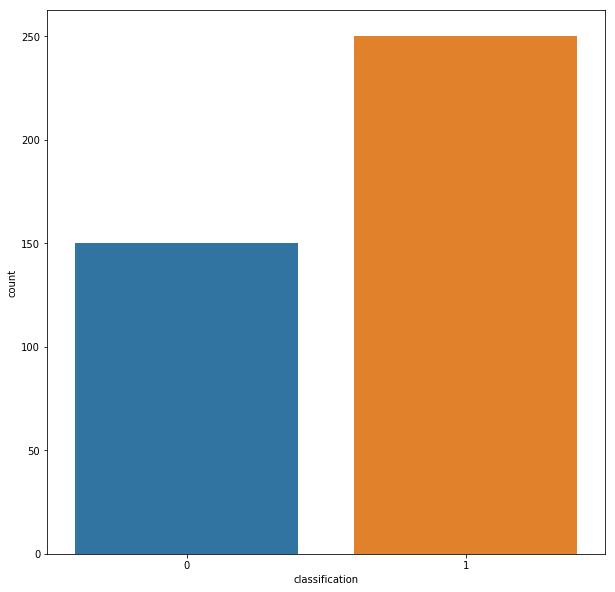

In [97]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='classification', data = df)
plt.show()

We can see that there are 250 out 400 kidney patients in our dataset

Let us find the number of Diabetic patients in our dataset

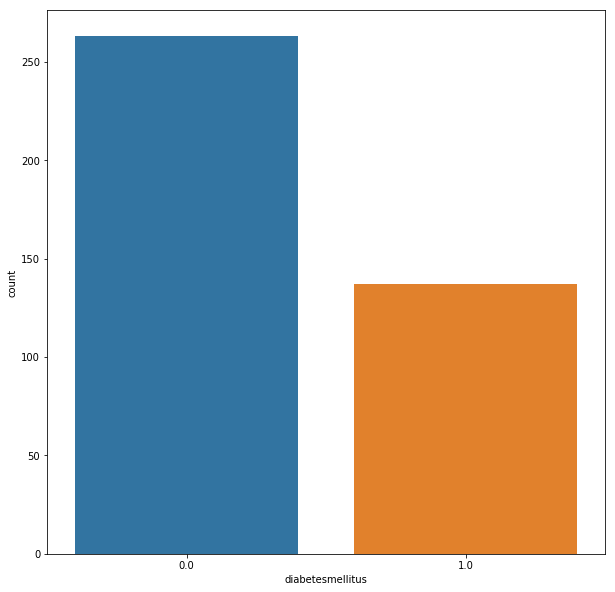

In [98]:

plt.figure(figsize=(10, 10))
sns.countplot(x ='diabetesmellitus', data = df)
plt.show()

We can observe that 140 people are diabetic

Let us find the number of heart patients in our dataset

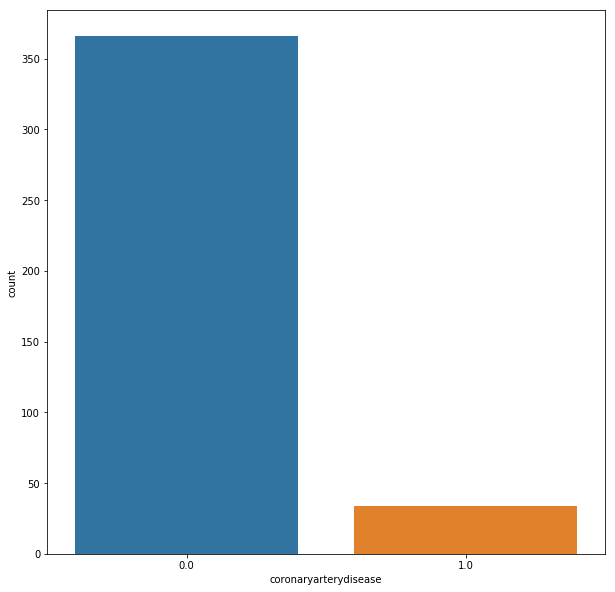

In [99]:

plt.figure(figsize=(10, 10))
sns.countplot(x ='coronaryarterydisease', data = df)
plt.show()

We can observe that there are 30 heart patients in our dataset 

Let us Visualise Blood Pressure in our dataset

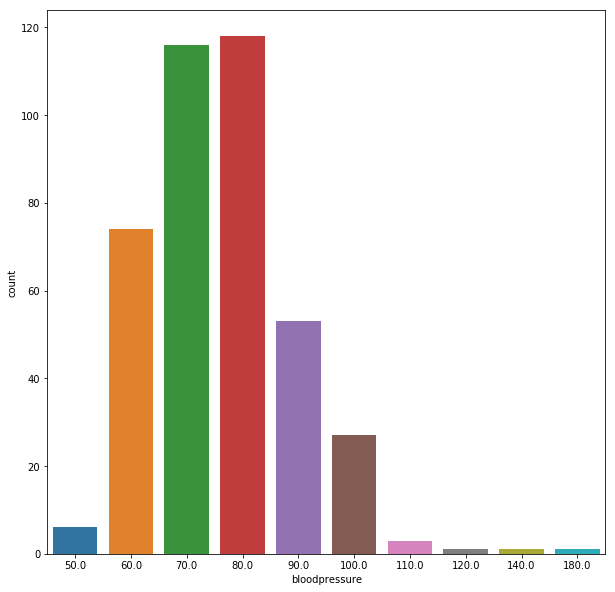

In [100]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='bloodpressure', data = df)
plt.show()

Now Let us Visualise age vs CKD In terms of hue graph

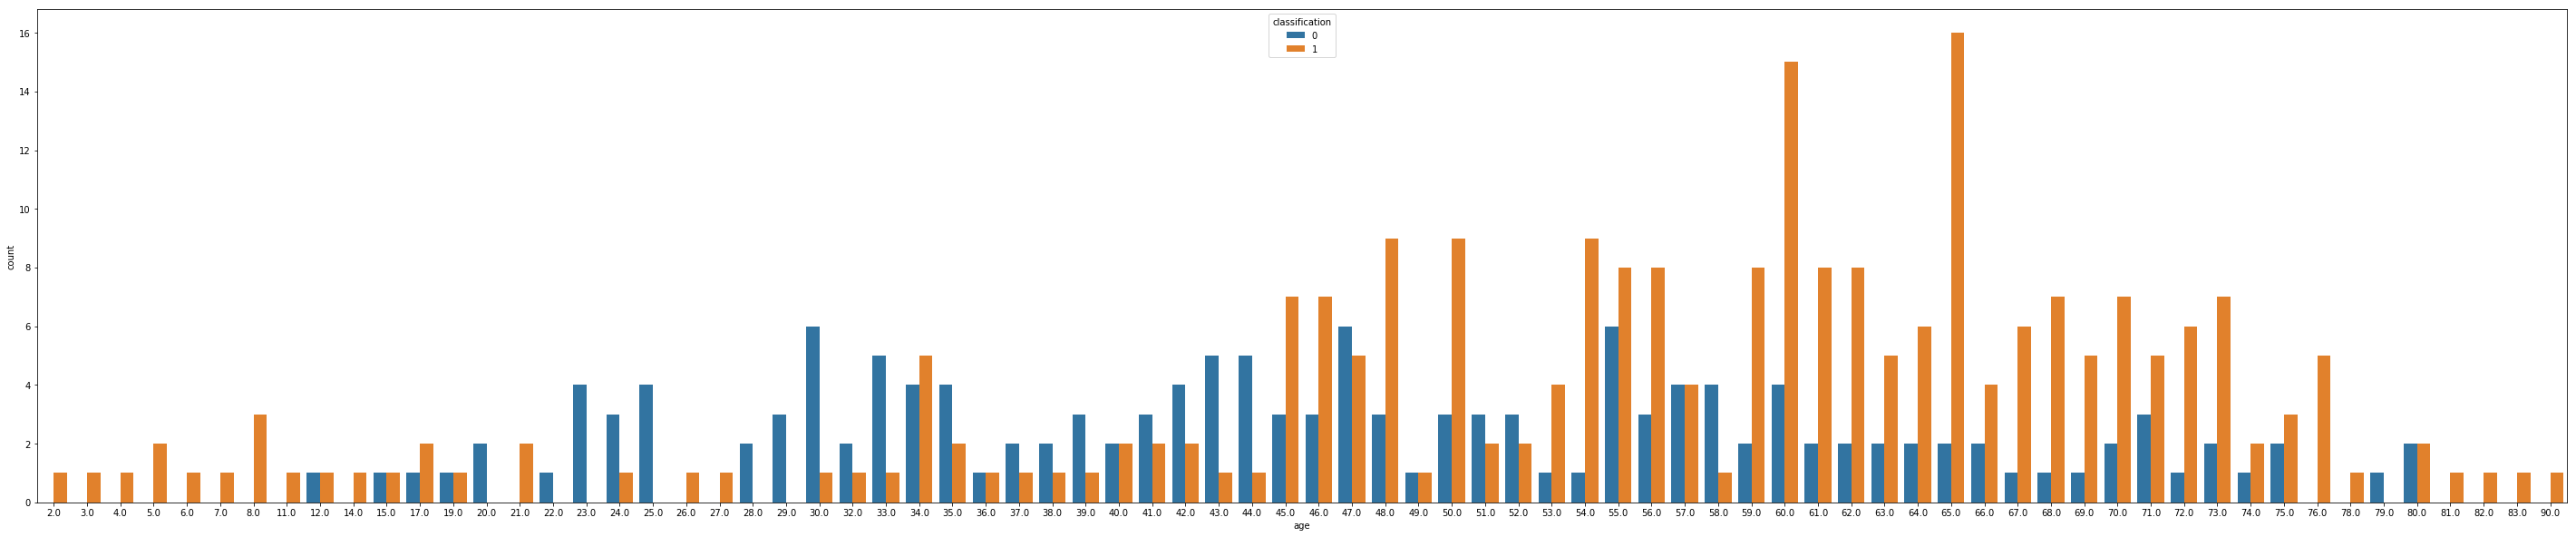

In [101]:
plt.figure(figsize=(50, 10))
sns.countplot(x ='age', data = df,hue='classification')
plt.show()

Now Let us Visualise blood pressure vs CKD In terms of hue graph

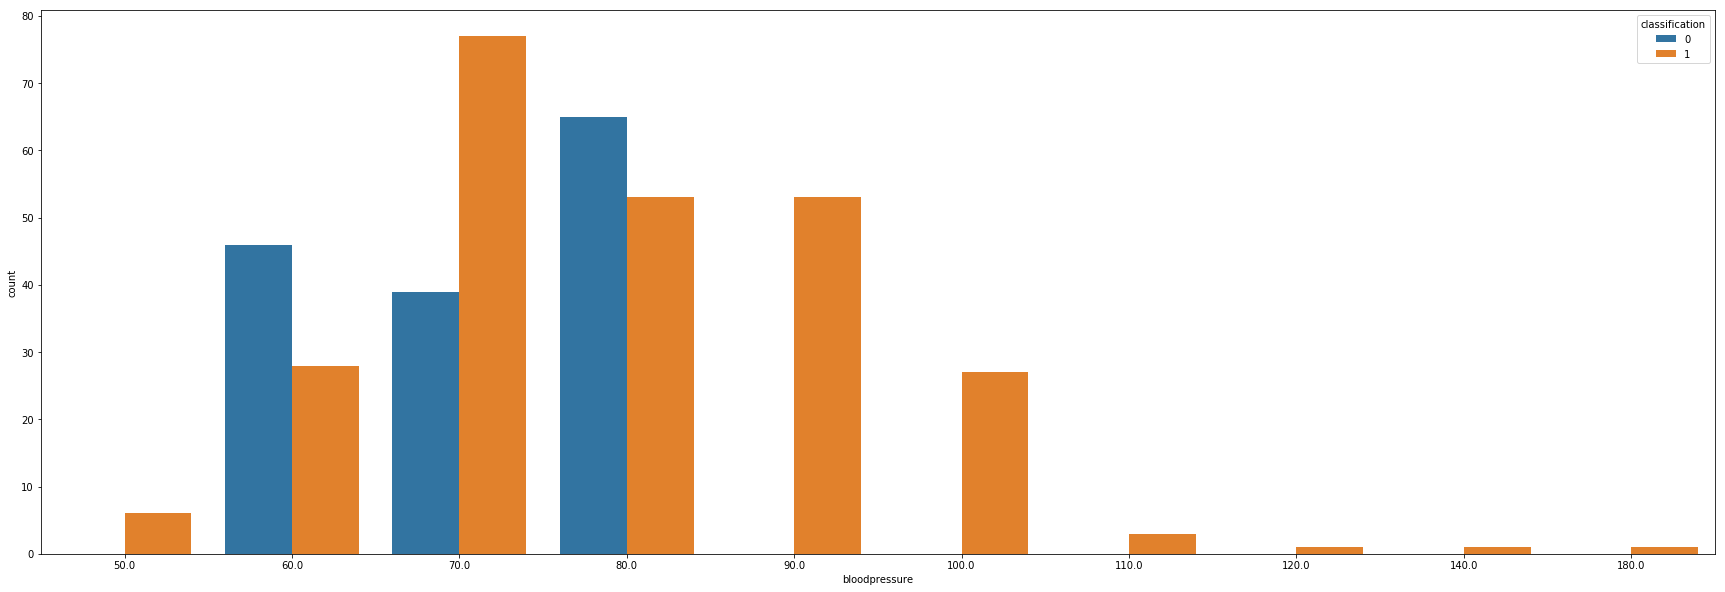

In [102]:
plt.figure(figsize=(30, 10))
sns.countplot(x ='bloodpressure', data = df,hue='classification')
plt.show()

Numerical data is a type of data that is expressed in terms of numbers rather than natural language descriptions. Similar to its name, numerical, it can only be collected in number form. Also known as quantitative data, this numerical data type can be used as a form of measurement, such as a person’s height, weight, IQ, etc.

Categorical data is a type of data that is used to group information with similar characteristics while Numerical data is a type of data that expresses information in the form of numbers. It combines numeric values to depict relevant information while categorical data uses a descriptive approach to express information

In [103]:
numericalFeatures = []
categoricalFeatures = []

In [104]:
for i in df.columns:
    if df[i].nunique()>=9:
        numericalFeatures.append(i)
    else:
        categoricalFeatures.append(i)

 DISTRIBUTION OF NUMERICAL FEATURES

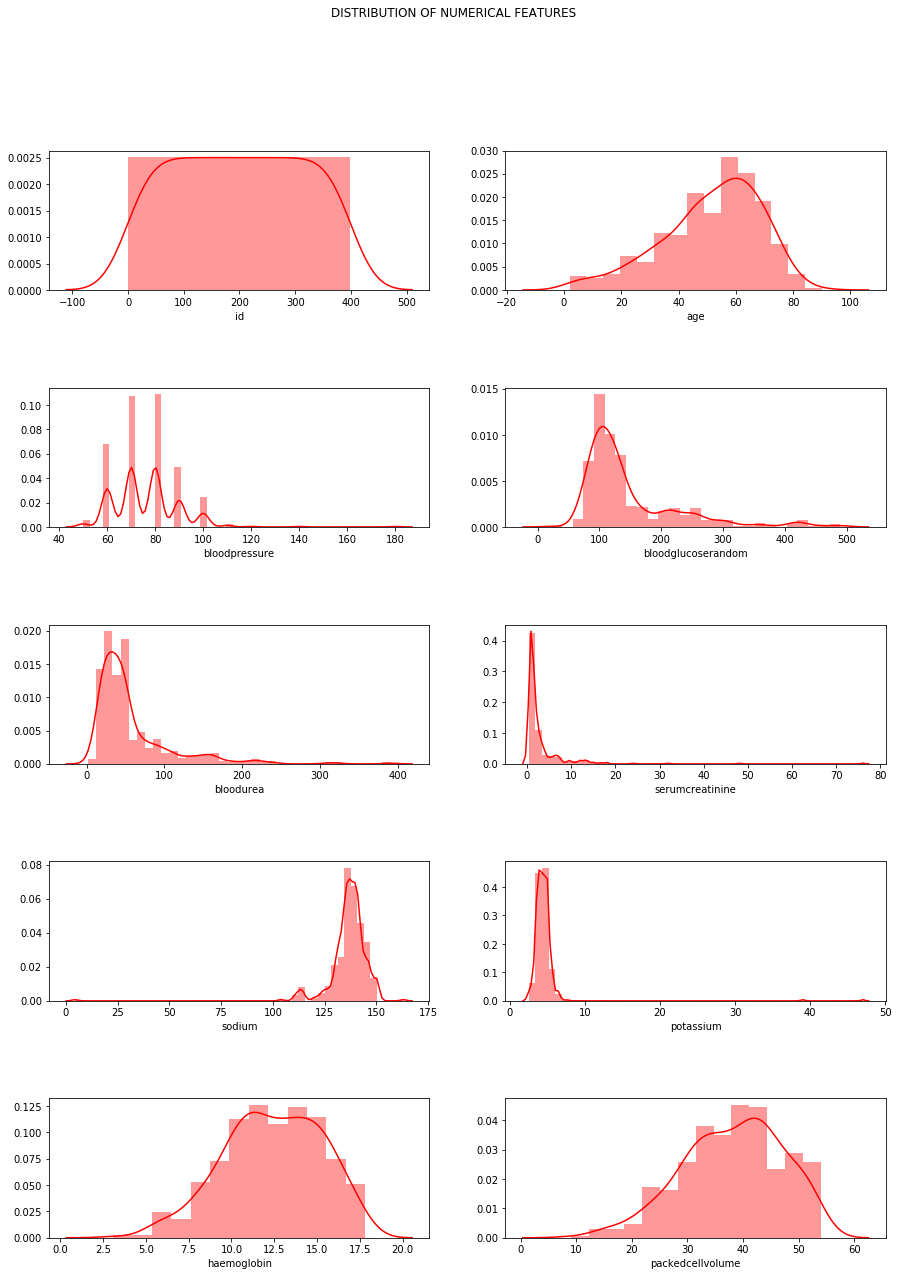

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('DISTRIBUTION OF NUMERICAL FEATURES')
for ax, feats in zip(axes.flatten(), numericalFeatures):
    sns.distplot(a=df[feats], ax=ax,color='red')


CONCLUSIONS FROM THE ABOVE PLOTS:


1)age looks a bit left skewed

2)Blood gluscose random is right skewed

3)Blood Urea is also a bit right skewed

DISTRIBUTION OF NUMERICAL FEATURES

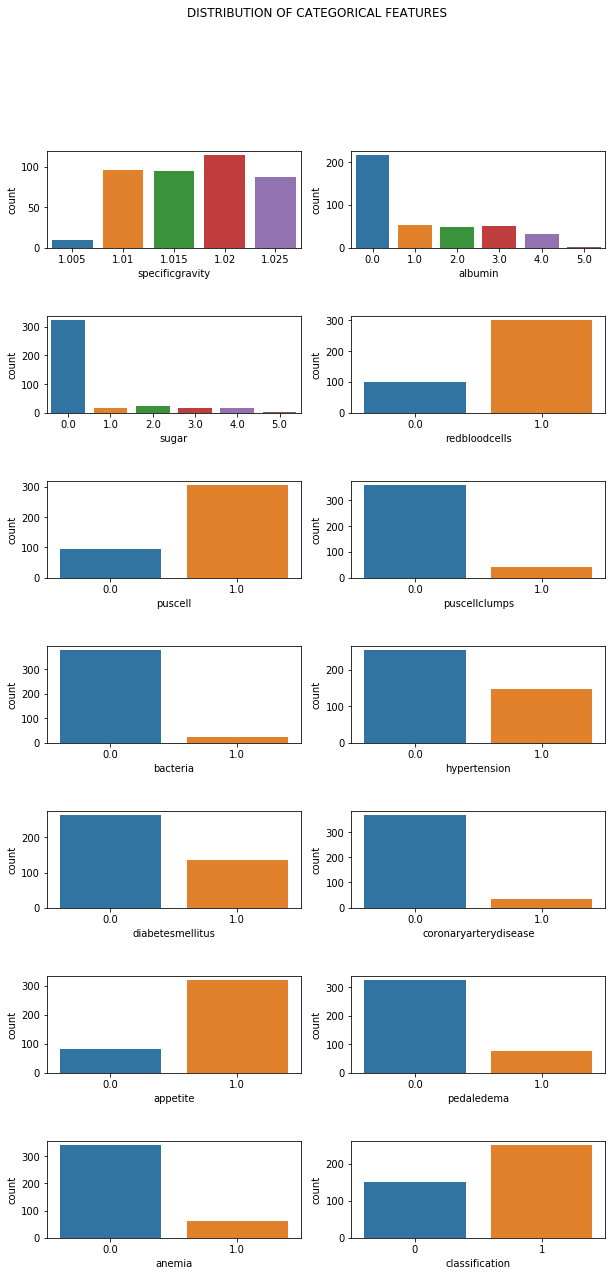

In [106]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('DISTRIBUTION OF CATEGORICAL FEATURES')
for ax, feats in zip(axes.flatten(), categoricalFeatures):
    sns.countplot(df[feats], ax=ax)

HEATMAP

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.It is used to show the correlation among the data.

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
id,1.000000,-0.192566,-0.251217,0.611089,-0.511674,-0.273331,0.395501,0.406226,-0.264142,-0.115955,...,0.592233,0.066214,0.558981,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.192566,1.000000,0.163751,-0.210610,0.133132,0.202630,-0.078760,-0.133763,0.155960,0.041886,...,-0.239922,0.036074,-0.153236,0.400967,0.370296,0.229504,-0.151713,0.093993,0.061160,0.236127
bloodpressure,-0.251217,0.163751,1.000000,-0.173693,0.131935,0.232853,-0.237796,-0.182759,0.061412,0.112154,...,-0.277585,-0.010939,-0.192429,0.278419,0.238125,0.087632,-0.180258,0.077766,0.208749,0.287039
specificgravity,0.611089,-0.210610,-0.173693,1.000000,-0.440037,-0.295896,0.327140,0.357778,-0.259846,-0.198158,...,0.548345,0.144424,0.481177,-0.377839,-0.433161,-0.155848,0.221253,-0.285849,-0.222038,-0.720167
albumin,-0.511674,0.133132,0.131935,-0.440037,1.000000,0.253735,-0.250778,-0.500153,0.355444,0.330071,...,-0.537004,-0.142471,-0.485837,0.513953,0.394725,0.296740,-0.310875,0.437742,0.329052,0.603927
sugar,-0.273331,0.202630,0.232853,-0.295896,0.253735,1.000000,-0.161064,-0.213185,0.124298,0.088473,...,-0.259947,-0.063692,-0.224483,0.308763,0.486089,0.231582,-0.068061,0.137595,0.119672,0.339571
redbloodcells,0.395501,-0.078760,-0.237796,0.327140,-0.250778,-0.161064,1.000000,0.288301,-0.084751,-0.063311,...,0.331285,0.074724,0.302126,-0.206571,-0.240286,-0.155268,0.193069,-0.147170,-0.161690,-0.447214
puscell,0.406226,-0.133763,-0.182759,0.357778,-0.500153,-0.213185,0.288301,1.000000,-0.441247,-0.277657,...,0.439491,0.055281,0.383850,-0.342249,-0.278079,-0.188008,0.255027,-0.343678,-0.259128,-0.432302
puscellclumps,-0.264142,0.155960,0.061412,-0.259846,0.355444,0.124298,-0.084751,-0.441247,1.000000,0.275082,...,-0.267591,-0.067646,-0.248211,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,-0.115955,0.041886,0.112154,-0.198158,0.330071,0.088473,-0.063311,-0.277657,0.275082,1.000000,...,-0.167229,-0.056991,-0.159918,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


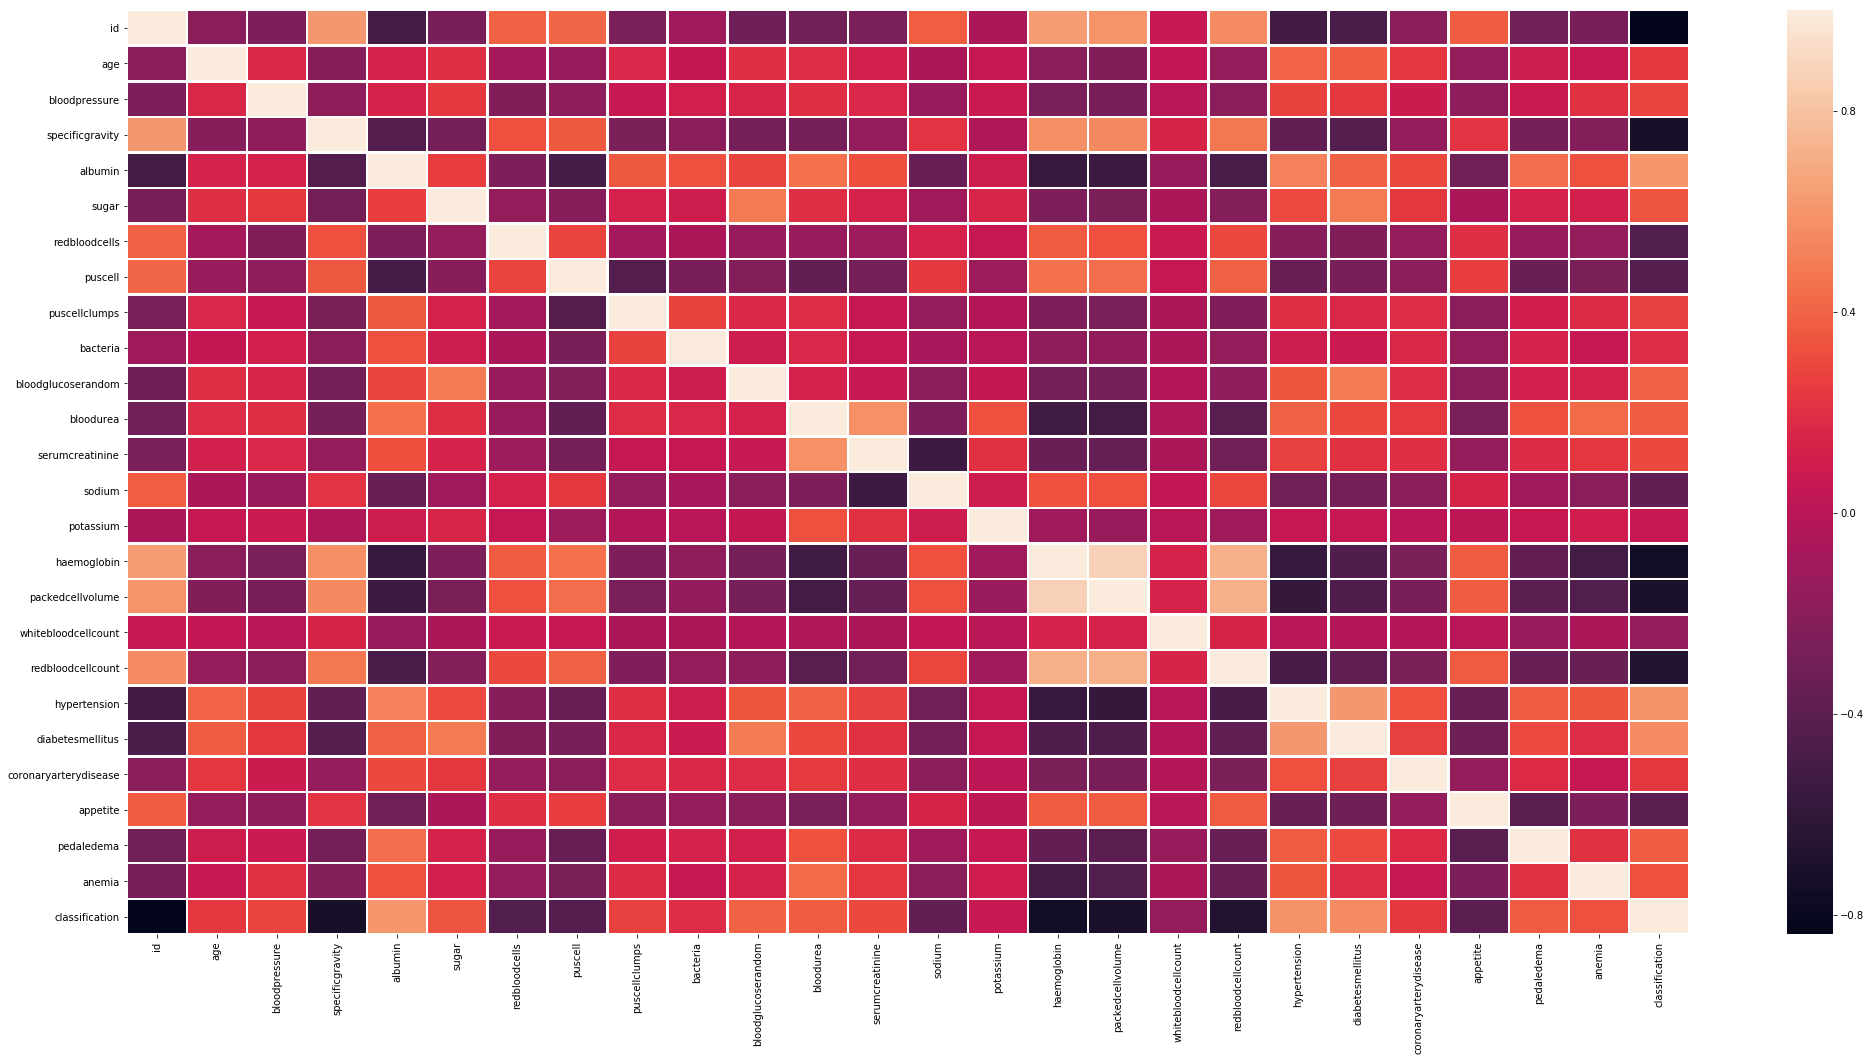

In [107]:
f= plt.subplots(figsize=(35,17))
corr=df.corr()
corr=(corr)
sns.heatmap(corr,
xticklabels= corr.columns.values,linewidth=1.5,
yticklabels=corr.columns.values)
corr

Now Let Us Build our model To Predict CHRONIC KIDNEY DISEASE

Algorithms we are using are

1)Logistic Regression


Let us implement Logistic Regression From Sctratch as well as from sklearn and let us determine their performence


In [108]:
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [109]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [130]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size =1/3 ,random_state=0) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

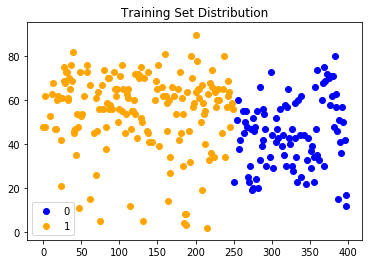

In [131]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='1')
plt.title("Training Set Distribution")
plt.legend();

In [132]:
class Logisticregression:
    def __init__(self, lr=0.02, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [133]:
model = Logisticregression(lr=0.02, num_iter=10000)
model.fit(X_train, y_train)

C:\Users\aditya1234\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\aditya1234\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\aditya1234\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


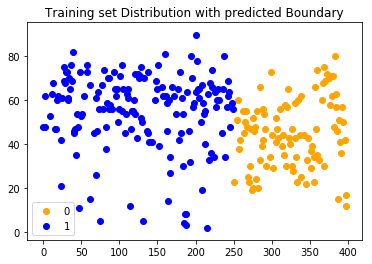

In [134]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='orange', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='1')
plt.title("Training set Distribution with predicted Boundary")
plt.legend();


In [135]:
Y_pred = model.predict(X_test)

In [136]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  51   1
   2  80


In [137]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [2 1]
False Negetives
 [1 2]
True Positives
 [51 80]
True Negetives
 [80 51]


In [138]:
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Sensitivity 
 [0.98076923 0.97560976]
Specificity 
 [0.97560976 0.98076923]
Precision 
 [0.96226415 0.98765432]
Recall 
 [0.98076923 0.97560976]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97142857 0.98159509]


Let us compare our model with Sklit-learns Logistic Regression Model

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\aditya1234\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
predictions= logmodel.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [142]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  51   1
   2  80


In [143]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [2 1]
False Negetives
 [1 2]
True Positives
 [51 80]
True Negetives
 [80 51]


In [144]:
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Sensitivity 
 [0.98076923 0.97560976]
Specificity 
 [0.97560976 0.98076923]
Precision 
 [0.96226415 0.98765432]
Recall 
 [0.98076923 0.97560976]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97142857 0.98159509]


Let us Implement KNN from  Scratch

In [145]:
from scipy.stats import mode
class KNearestNeighbors() :
    def __init__( self, A ) :
        self.A = A
        
    def fit( self, X_train, Y_train ) : 
        self.X_train = X_train 
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
        
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
    
    def find_neighbors( self, x ) : 
        euclidean_distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.A] 
   
        
    def predict( self, X_test ) : 
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
            neighbors = np.zeros( self.A ) 
            neighbors = self.find_neighbors( x ) 
            Y_predict[i] = mode( neighbors )[0][0]	 
        return Y_predict 

    


In [147]:
kmodel = KNearestNeighbors( A = 3 ) 
Y_pred=kmodel.fit( X_train, y_train ) 

cm = confusion_matrix(y_test,Y_pred)


In [148]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [2 1]
False Negetives
 [1 2]
True Positives
 [51 80]
True Negetives
 [80 51]


In [149]:
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Sensitivity 
 [0.98076923 0.97560976]
Specificity 
 [0.97560976 0.98076923]
Precision 
 [0.96226415 0.98765432]
Recall 
 [0.98076923 0.97560976]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97142857 0.98159509]


LET US build ANN Model

In [176]:
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [177]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [178]:
#Split the data into 70% training and 30% testing 
X_train,  X_test, y_train, y_test = train_test_split( X, y, test_size=1/3,random_state=52)

In [179]:
#Build The model
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [180]:
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [181]:
#Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0]) 

Epoch 1/2000
1/1 [==============================] - 0s 301ms/step - loss: 0.6780 - accuracy: 0.6203
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6609 - accuracy: 0.6203
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6203
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6287 - accuracy: 0.6203
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.6203
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5986 - accuracy: 0.6504
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.8008
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5701 - accuracy: 0.9624
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5561 - accuracy: 1.0000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5421 - accuracy: 1.0000
Epoch 11/2000
1/1

1/1 [==============================] - 0s 6ms/step - loss: 0.0660 - accuracy: 0.9586
Epoch 84/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0649 - accuracy: 0.9586
Epoch 85/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0639 - accuracy: 0.9624
Epoch 86/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9662
Epoch 87/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 0.9662
Epoch 88/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9662
Epoch 89/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9662
Epoch 90/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9662
Epoch 91/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9662
Epoch 92/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0576 - accuracy: 0.9662
Epoch 93/2000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9925
Epoch 165/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9925
Epoch 166/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.9925
Epoch 167/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9925
Epoch 168/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0285 - accuracy: 0.9925
Epoch 169/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9925
Epoch 170/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9925
Epoch 171/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9925
Epoch 172/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9962
Epoch 173/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9962
Epoch 174/2000


1/1 [==============================] - 0s 19ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 247/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 248/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 249/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 250/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 251/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 252/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 253/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 254/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 255/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 256/2000

1/1 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 328/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 329/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 330/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 331/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 332/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 333/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 334/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 335/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 336/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 337/2000


1/1 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 409/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 410/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 411/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 412/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 413/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 414/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 415/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 416/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 417/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 418/2000


1/1 [==============================] - 0s 5ms/step - loss: 7.7161e-04 - accuracy: 1.0000
Epoch 489/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.5268e-04 - accuracy: 1.0000
Epoch 490/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.3924e-04 - accuracy: 1.0000
Epoch 491/2000
1/1 [==============================] - 0s 7ms/step - loss: 7.4035e-04 - accuracy: 1.0000
Epoch 492/2000
1/1 [==============================] - 0s 5ms/step - loss: 7.0944e-04 - accuracy: 1.0000
Epoch 493/2000
1/1 [==============================] - 0s 7ms/step - loss: 7.1268e-04 - accuracy: 1.0000
Epoch 494/2000
1/1 [==============================] - 0s 4ms/step - loss: 6.9621e-04 - accuracy: 1.0000
Epoch 495/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.7712e-04 - accuracy: 1.0000
Epoch 496/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.8276e-04 - accuracy: 1.0000
Epoch 497/2000
1/1 [==============================] - 0s 5ms/step - loss: 6.548

1/1 [==============================] - 0s 4ms/step - loss: 1.0349e-06 - accuracy: 1.0000
Epoch 567/2000
1/1 [==============================] - 0s 9ms/step - loss: 3.3909e-06 - accuracy: 1.0000
Epoch 568/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 569/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 570/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 571/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 572/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9537e-06 - accuracy: 1.0000
Epoch 573/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 574/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7159e-06 - accuracy: 1.0000
Epoch 575/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.943

1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 645/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 646/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 647/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 648/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 649/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 650/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 651/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 652/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 653/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.000

1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 723/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 724/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 725/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 726/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 727/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 728/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 729/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 730/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 731/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.000

1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 801/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 802/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 803/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 804/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 805/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 806/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 807/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 808/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 809/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.000

1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 879/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 880/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 881/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 882/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 883/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 884/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 885/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 886/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 887/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.000

1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 957/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 958/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 959/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 960/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 961/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 962/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 963/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 964/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 965/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.000

1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1035/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1036/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1037/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1038/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1039/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1040/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1041/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1042/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1043/2000
1/1 [==============================] - 0s 6ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1112/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1113/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1114/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1115/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1116/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1117/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1118/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1119/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1120/2000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1190/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1191/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1192/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1193/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1194/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1195/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1196/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1197/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1198/2000
1/1 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1268/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1269/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1270/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1271/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1272/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1273/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1274/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1275/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1276/2000
1/1 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1345/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1346/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1347/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1348/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1349/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1350/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1351/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1352/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1353/2000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1422/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1423/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1424/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1425/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1426/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1427/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1428/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1429/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1430/2000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1499/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1500/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1501/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1502/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1503/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1504/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1505/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1507/2000
1/1 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1577/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1578/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1579/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1580/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1581/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1582/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1583/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1584/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1585/2000
1/1 [==============================] - 0s 5ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1654/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1655/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1656/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1657/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1658/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1659/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1660/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1661/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1662/2000
1/1 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1731/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1732/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1733/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1734/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1735/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1736/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1737/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1738/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1739/2000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1808/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1809/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1810/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1811/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1812/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1813/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1814/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1815/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1816/2000
1/1 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1885/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1886/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1887/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1888/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1889/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1890/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1891/2000
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1892/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1893/2000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1962/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1963/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1964/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1965/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1966/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1967/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1968/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1969/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1970/2000
1/1 [==============================] - 0s 6ms/step - lo

In [182]:

for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
 

  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()
    
cm = confusion_matrix(y_test,pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

Model file:  ckd.model
5/5 [==============================] - 0s 2ms/step - loss: 1.0526e-04 - accuracy: 1.0000

Original  : 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1

Predicted : 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1

Scores    : loss =  0.00010526276309974492  acc =  1.0
----

In [183]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [0 0]
False Negetives
 [0 0]
True Positives
 [49 85]
True Negetives
 [85 49]


In [184]:
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Sensitivity 
 [1. 1.]
Specificity 
 [1. 1.]
Precision 
 [1. 1.]
Recall 
 [1. 1.]
Áccuracy 
[1. 1.]
FScore 
[1. 1.]
